Mike Colombet
ACT 102 - Exercice Titanic pricing Rose et Jack
mike.colombet@outlook.com

Paramètres initiaux

In [29]:
import os
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 
%pylab inline
import pandas_profiling as pdprof
from tkinter import *

pd.set_option('display.max_row', 111)
pd.set_option('display.max_column', 111)

Populating the interactive namespace from numpy and matplotlib


Importation des données titanic et quelques checks de qualité

In [2]:
data = sns.load_dataset('titanic')
data.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [3]:
data.shape

(891, 15)

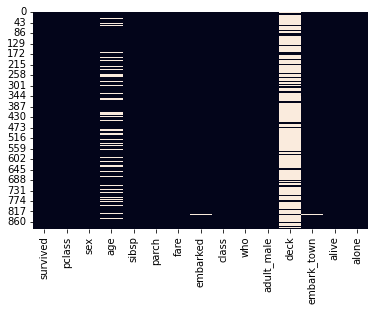

In [30]:
plt.figure()
# plt.figure(figsize=(20,10))
sns.heatmap(data.isna(), cbar=False)
plt.show()

In [31]:
(data.isna().sum()/data.shape[0]).sort_values(ascending=True)

survived       0.000000
pclass         0.000000
sex            0.000000
sibsp          0.000000
parch          0.000000
fare           0.000000
class          0.000000
who            0.000000
adult_male     0.000000
alive          0.000000
alone          0.000000
embarked       0.002245
embark_town    0.002245
age            0.198653
deck           0.772166
dtype: float64

In [32]:
corrected_data = data[data.columns[data.isna().sum()/data.shape[0] <0.7]]
corrected_data = corrected_data.dropna(subset=['age'])

Examen variable cible

In [33]:
corrected_data['survived'].value_counts(normalize=True)

0    0.593838
1    0.406162
Name: survived, dtype: float64

C:\Users\mikec\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\mikec\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


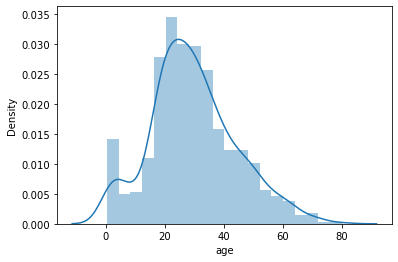

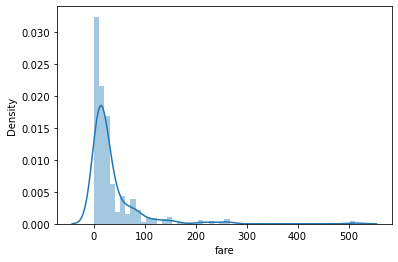

In [34]:
for col in corrected_data.select_dtypes('float'):
    plt.figure()
    sns.distplot(corrected_data[col])

In [35]:
for col in corrected_data.select_dtypes('object'):
    print(f'{col :-<12} {corrected_data[col].unique()}')

sex--------- ['male' 'female']
embarked---- ['S' 'C' 'Q' nan]
who--------- ['man' 'woman' 'child']
embark_town- ['Southampton' 'Cherbourg' 'Queenstown' nan]
alive------- ['no' 'yes']


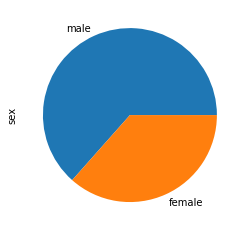

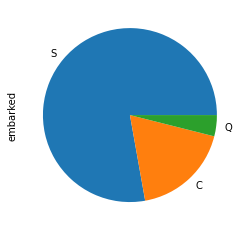

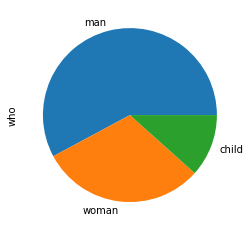

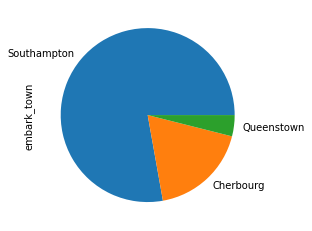

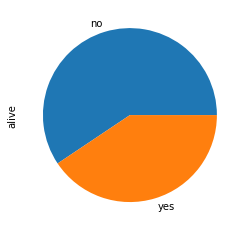

In [36]:
for col in corrected_data.select_dtypes('object'):
    plt.figure()
    corrected_data[col].value_counts().plot.pie()

Séparation des vivants et morts puis femmes et hommes

In [37]:
survived_data = corrected_data[corrected_data['survived'] == 1]
dead_data = corrected_data[corrected_data['survived'] == 1]

In [38]:
male_data = corrected_data[corrected_data['sex'] == 'male']
female_data = corrected_data[corrected_data['sex'] == 'female']

Quelques visualisations exploratoires

<AxesSubplot:xlabel='sex', ylabel='count'>

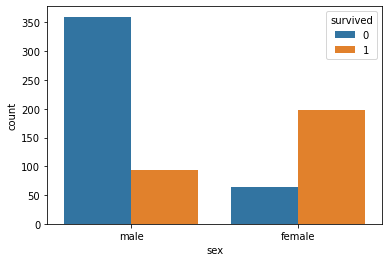

In [39]:
sns.countplot(x='sex', hue='survived', data=corrected_data)

<AxesSubplot:xlabel='age', ylabel='count'>

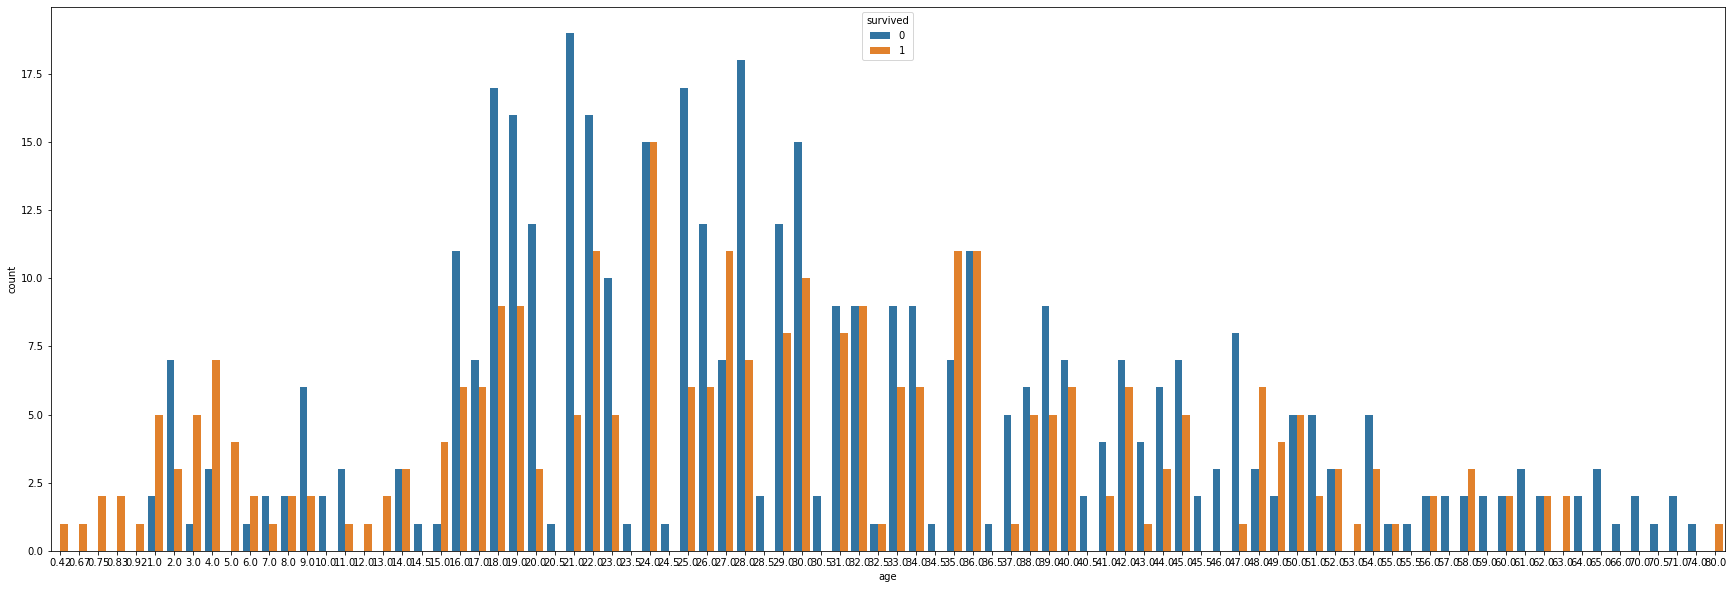

In [40]:
plt.figure(figsize=(30,10))
sns.countplot(x='age', hue='survived', data=corrected_data)

<AxesSubplot:xlabel='pclass', ylabel='count'>

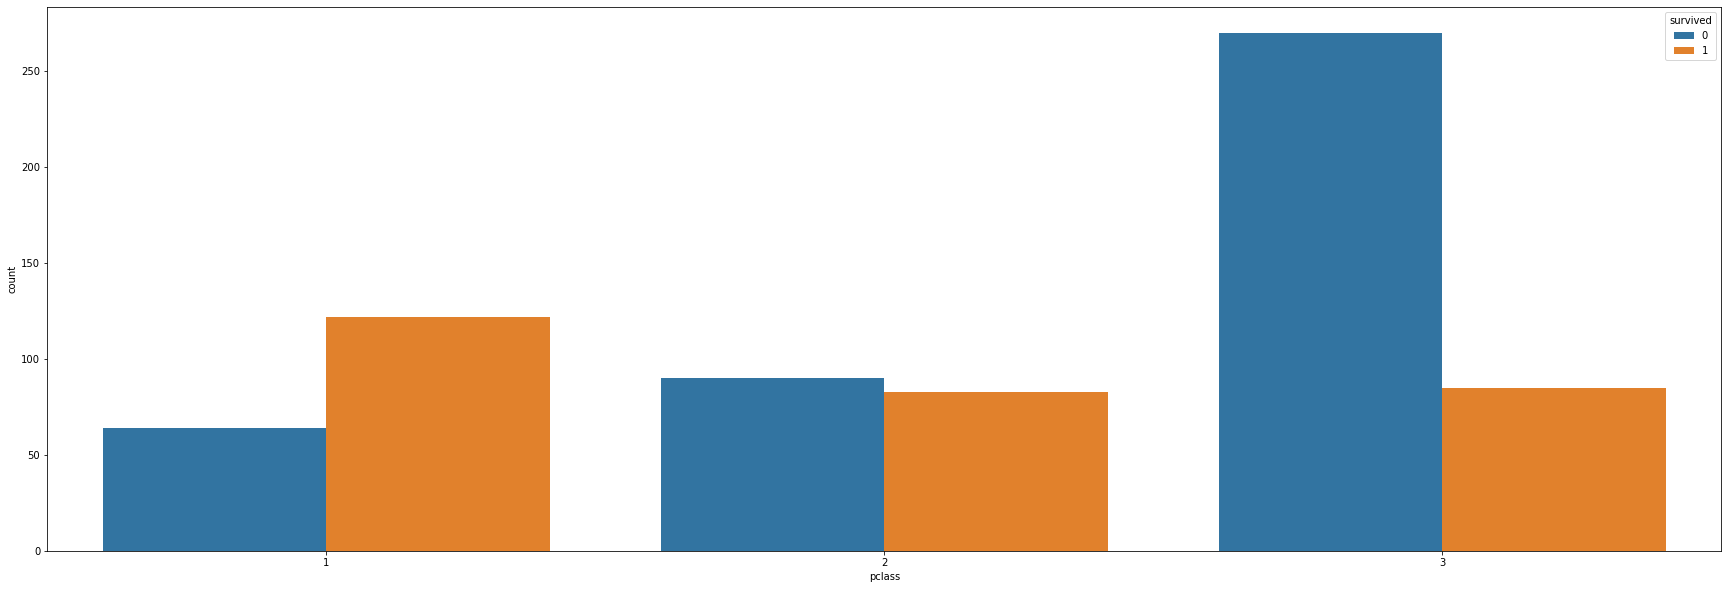

In [41]:
plt.figure(figsize=(30,10))
sns.countplot(x='pclass', hue='survived', data=corrected_data)

<AxesSubplot:xlabel='pclass', ylabel='count'>

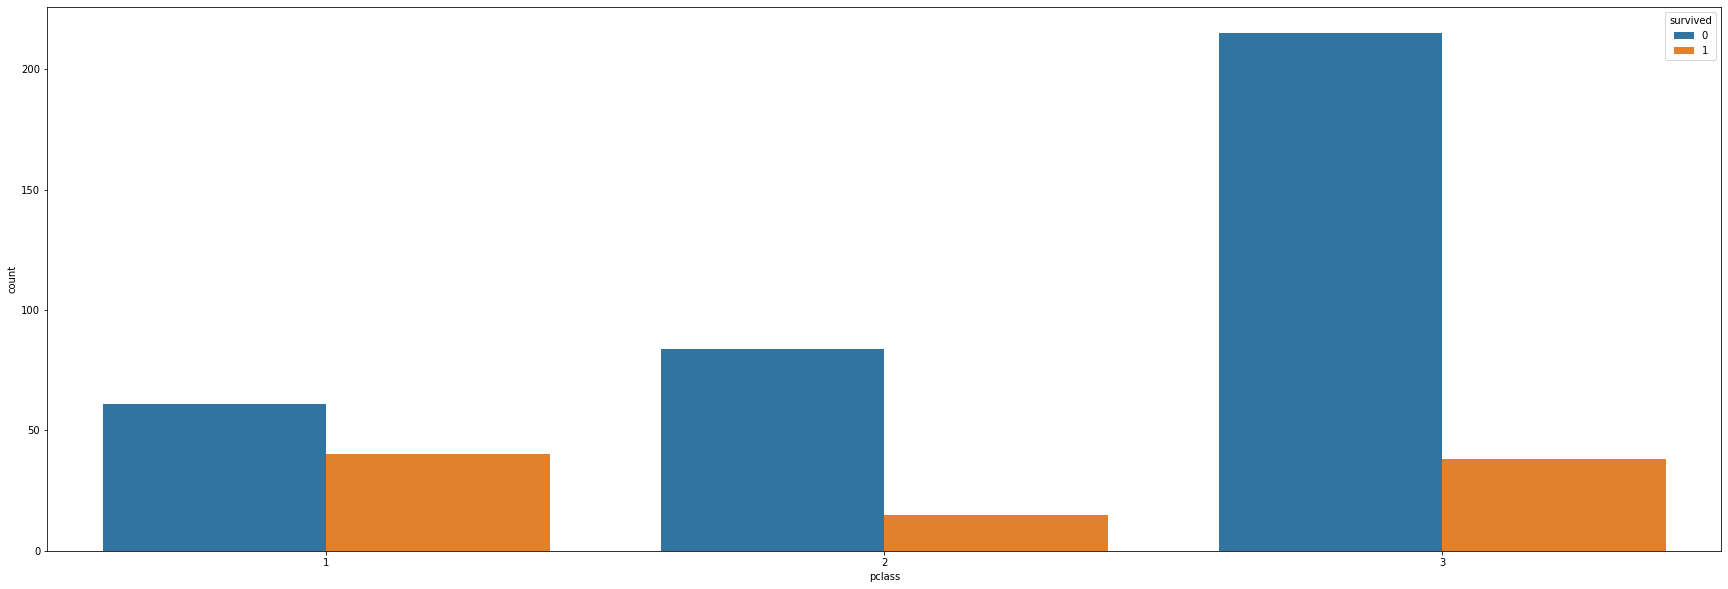

In [42]:
plt.figure(figsize=(30,10))
sns.countplot(x='pclass', hue='survived', data=male_data)

<AxesSubplot:xlabel='pclass', ylabel='count'>

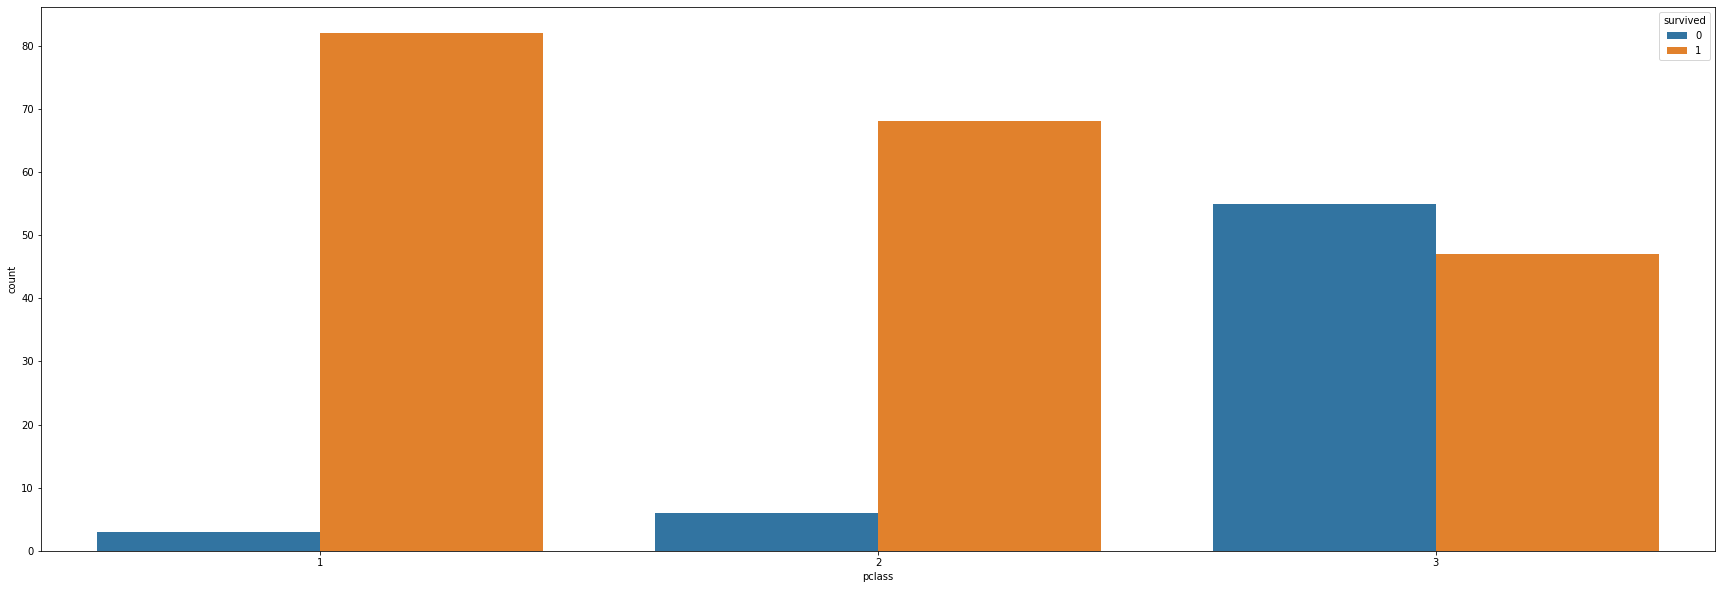

In [43]:
plt.figure(figsize=(30,10))
sns.countplot(x='pclass', hue='survived', data=female_data)

<AxesSubplot:xlabel='sex', ylabel='survived'>

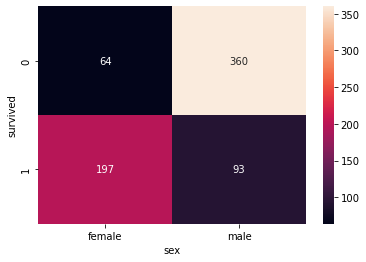

In [44]:
plt.figure()
sns.heatmap(pd.crosstab(corrected_data['survived'], corrected_data['sex']), annot=True, fmt='d')

<AxesSubplot:xlabel='pclass', ylabel='survived'>

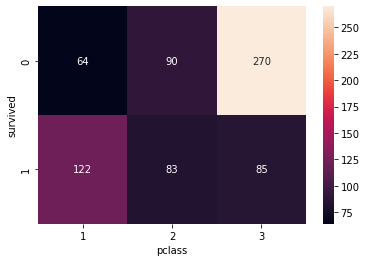

In [45]:
plt.figure()
sns.heatmap(pd.crosstab(corrected_data['survived'], corrected_data['pclass']), annot=True, fmt='d')

Génération d'un tableau croisé avec les données supposées corrélées avec la variable cible (survived)

In [46]:
pd.crosstab([corrected_data.sex,corrected_data.pclass], corrected_data.survived, normalize='index').round(4)

survived            0       1
sex    pclass                
female 1       0.0353  0.9647
       2       0.0811  0.9189
       3       0.5392  0.4608
male   1       0.6040  0.3960
       2       0.8485  0.1515
       3       0.8498  0.1502

Check correlation survived / pclass & sex

In [47]:
def gender(corrected_data):
    if corrected_data.sex == 'male':
        return 1
    elif corrected_data.sex == 'female':
        return 2

In [48]:
corrected_data['genre'] = corrected_data.apply(gender, axis=1)

In [49]:
corrected_data.corr()['survived'].sort_values()

adult_male   -0.552936
pclass       -0.359653
alone        -0.196140
age          -0.077221
sibsp        -0.017358
parch         0.093317
fare          0.268189
genre         0.538826
survived      1.000000
Name: survived, dtype: float64

In [50]:
male_data.corr()['survived'].sort_values()

adult_male   -0.246323
pclass       -0.221893
alone        -0.132735
age          -0.119618
sibsp        -0.016908
parch         0.098726
fare          0.183421
survived      1.000000
Name: survived, dtype: float64

In [51]:
female_data.corr()['survived'].sort_values()

pclass       -0.504753
sibsp        -0.202293
parch        -0.197707
alone         0.064503
age           0.116109
fare          0.230962
survived      1.000000
adult_male         NaN
Name: survived, dtype: float64

Application finale pour déterminer le pourcentage à payer pour Jack et Rose

Hypothèses
Probabilité naufrage = 10%
Probabilité de mourir corrélée avec le genre et la classe

In [52]:
#conditional filtering

prob_sink = 0.1

rose_pclass = 1
rose_sex = 2

price_rose = prob_sink * (1 - (corrected_data.survived[(corrected_data['pclass']==rose_pclass) & (corrected_data['genre']==rose_sex)].sum() / corrected_data.survived[(corrected_data['pclass']==rose_pclass) & (corrected_data['genre']==rose_sex)].count()))

jack_pclass = 3
jack_sex = 1

price_jack = prob_sink * (1 -(corrected_data.survived[(corrected_data['pclass']==jack_pclass) & (corrected_data['genre']==jack_sex)].sum() / corrected_data.survived[(corrected_data['pclass']==jack_pclass) & (corrected_data['genre']==jack_sex)].count()))

print('Rose paye : ', price_rose.round(3)*100, '%')
print('Jack paye : ', price_jack.round(3)*100, '%')

Rose paye :  0.4 %
Jack paye :  8.5 %


Tentative Machine learning

In [102]:
ML_Data = corrected_data.copy()

key_columns = ['survived', 'pclass', 'age', 'genre']

ML_Data = ML_Data[key_columns]

ML_Data.head()

,survived,pclass,age,genre
0,0,3,22.0,1
1,1,1,38.0,2
2,1,3,26.0,2
3,1,1,35.0,2
4,0,3,35.0,1


TrainTest - Nettoyage - Encodage

In [103]:
from sklearn.model_selection import train_test_split

In [104]:
trainset, testset = train_test_split(ML_Data, test_size=0.2, random_state=0)

In [105]:
trainset['survived'].value_counts()

0    345
1    226
Name: survived, dtype: int64

In [106]:
testset['survived'].value_counts()

0    79
1    64
Name: survived, dtype: int64

Modélisation

In [107]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import make_pipeline
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.preprocessing import PolynomialFeatures
from sklearn.decomposition import PCA

In [108]:
model_1 = RandomForestClassifier(random_state=0)

In [109]:
model_2 = make_pipeline(PolynomialFeatures(2), SelectKBest(f_classif, k=10),
                      RandomForestClassifier(random_state=0))

In [110]:
def preprocessing(df):
    
#     df = encodage(df)
#     df = feature_engineering(df)
#     df = imputation(df)
    
    X = ML_Data.drop('survived', axis=1)
    y = ML_Data['survived']
    
    print(y.value_counts())
    
    return X, y

In [111]:
X_train, y_train = preprocessing(trainset)

0    424
1    290
Name: survived, dtype: int64


In [112]:
X_test, y_test = preprocessing(testset)

0    424
1    290
Name: survived, dtype: int64


Evaluation du modèle

In [113]:
from sklearn.metrics import f1_score, confusion_matrix, classification_report
from sklearn.model_selection import learning_curve

In [114]:
def evaluation(model):
    
    model.fit(X_train, y_train)
    ypred = model.predict(X_test)
    
    print(confusion_matrix(y_test, ypred))
    print(classification_report(y_test, ypred))
    
    N, train_score, val_score = learning_curve(model, X_train, y_train,
                                              cv=4, scoring='f1',
                                               train_sizes=np.linspace(0.1, 1, 10))
    
    
    plt.figure(figsize=(12, 8))
    plt.plot(N, train_score.mean(axis=1), label='train score')
    plt.plot(N, val_score.mean(axis=1), label='validation score')
    plt.legend()

[[407  17]
 [ 57 233]]
              precision    recall  f1-score   support

           0       0.88      0.96      0.92       424
           1       0.93      0.80      0.86       290

    accuracy                           0.90       714
   macro avg       0.90      0.88      0.89       714
weighted avg       0.90      0.90      0.89       714



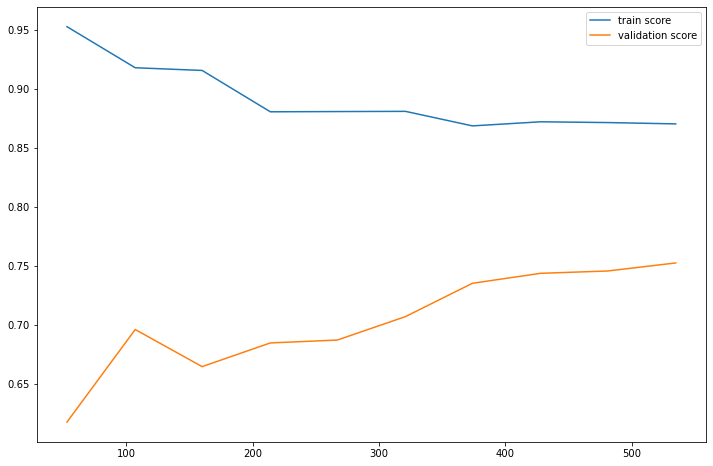

In [115]:
evaluation(model_1)

<AxesSubplot:>

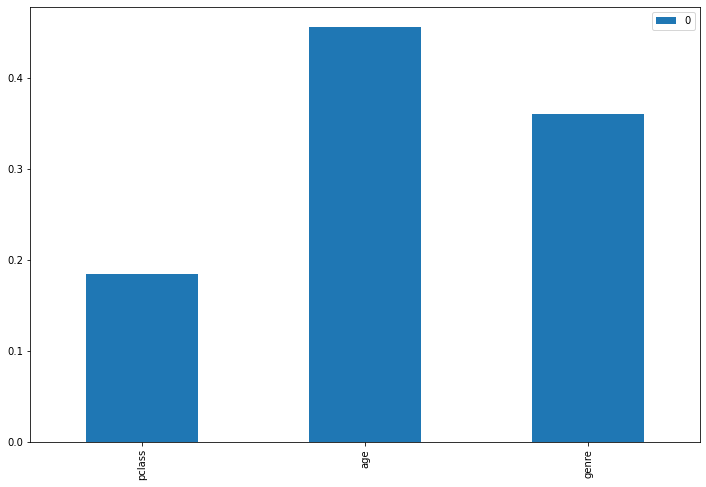

In [116]:
pd.DataFrame(model_1.feature_importances_, index=X_train.columns).plot.bar(figsize=(12, 8))

Fait intéressant, comparé à la première méthode empirique, la random forest a determiné l'age comme critère le plus important, puis genre (comme observé) et enfin la classe dans une moindre mesure.

Concernant l'age, lors de la première méthode, en effet, le distingo entre enfant et adulte n'a pas été fait.

Nous allons maintenant tenter d'optimiser le modèle, voire en utiliser un potentiellement plus adapté

A SUIVRE